# Churn Modeling

## Group: Naima Khan (22897), Sameen Amna (22317), Javeria Ishaque (22607), Nabiha Tariq (22592), Suha Ahmed (22602)

In [263]:
#fetch the data 
import pandas as pd

churn_data = pd.read_csv('/Users/Naima Khan/OneDrive/7th semester/Essentials to Data Analytics/WA_Fn-UseC_-Telco-Customer-Churn.csv')
churn_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Unnecessary Columns

In [264]:
#Get rid of the unnecessary columns from the data.
del churn_data['customerID']

churn_data


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


# Checking Missing Values

In [265]:
#checking missing values
churn_data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

# Head()

In [266]:
print(churn_data.head())


   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No  

# Describe()

In [267]:
print(churn_data.describe())

       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7032.000000
mean        0.162147    32.371149       64.761692   2283.300441
std         0.368612    24.559481       30.090047   2266.771362
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.850000   3794.737500
max         1.000000    72.000000      118.750000   8684.800000


In [268]:
print(churn_data.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


# Pairwise Correlation

                    gender   Partner  Dependents  PhoneService  MultipleLines  \
gender            1.000000 -0.001808    0.010517     -0.006488      -0.006739   
Partner          -0.001808  1.000000    0.452676      0.017706       0.142410   
Dependents        0.010517  0.452676    1.000000     -0.001762      -0.024991   
PhoneService     -0.006488  0.017706   -0.001762      1.000000      -0.020538   
MultipleLines    -0.006739  0.142410   -0.024991     -0.020538       1.000000   
InternetService  -0.000863  0.000891    0.044590      0.387436      -0.109216   
OnlineSecurity   -0.015017  0.150828    0.152166     -0.015198       0.007141   
OnlineBackup     -0.012057  0.153130    0.091015      0.024105       0.117327   
DeviceProtection  0.000549  0.166330    0.080537      0.003727       0.122318   
TechSupport      -0.006825  0.126733    0.133524     -0.019158       0.011466   
StreamingTV      -0.006421  0.137341    0.046885      0.055353       0.175059   
StreamingMovies  -0.008743  

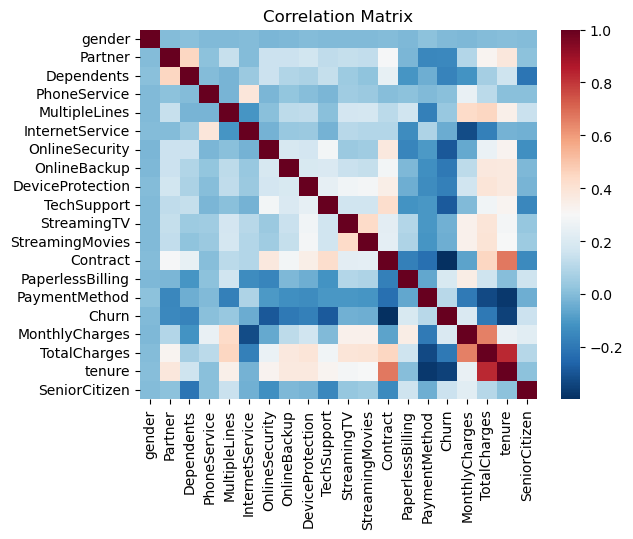

In [269]:
#Calculate the pairwise correlation to find the relationship between features.
from sklearn.preprocessing import LabelEncoder
categorical = churn_data.drop(columns=['MonthlyCharges','TotalCharges','tenure','SeniorCitizen'])

label_encoder=LabelEncoder()
churn_data_new =categorical.apply(label_encoder.fit_transform)
numerical= churn_data[['MonthlyCharges','TotalCharges','tenure','SeniorCitizen']]
churn_data_encoded=pd.merge(churn_data_new,numerical,left_index=True,right_index=True)

corr_matrix=churn_data_encoded.corr()
print(corr_matrix)

sns.heatmap(corr_matrix, annot=False, cmap='RdBu_r')
plt.title('Correlation Matrix')
plt.show()


# Histograms / Barplots

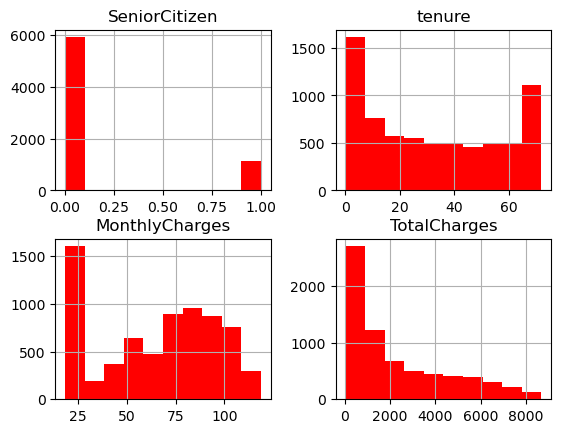

In [270]:
# Q:  draw the histogram of each feature.
# We drew histograms of numerical features and barplots for the categorical features.

import matplotlib.pyplot as plt

numerical_features = ['SeniorCitizen','tenure', 'MonthlyCharges', 'TotalCharges']
churn_data[numerical_features].hist(bins=10,color='red')
plt.show()


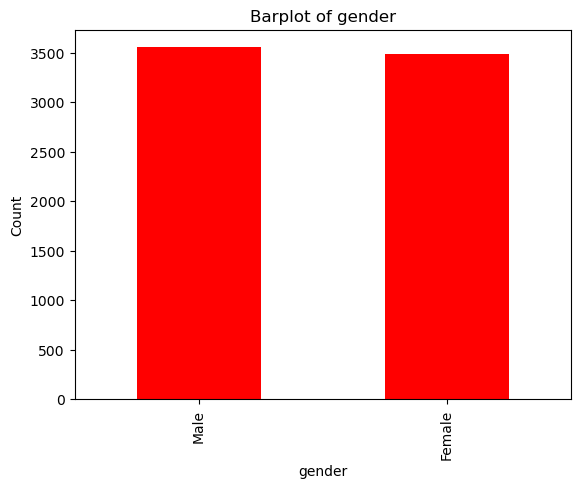

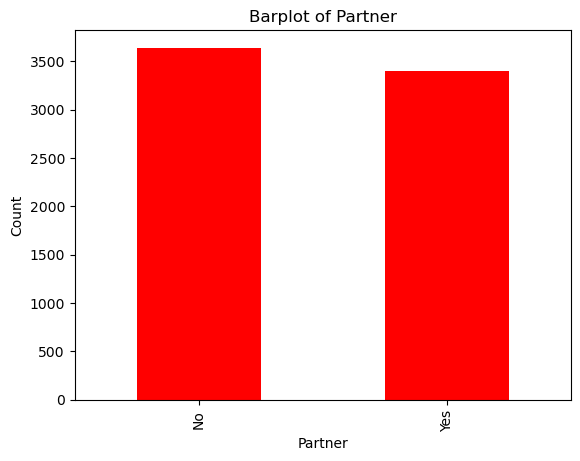

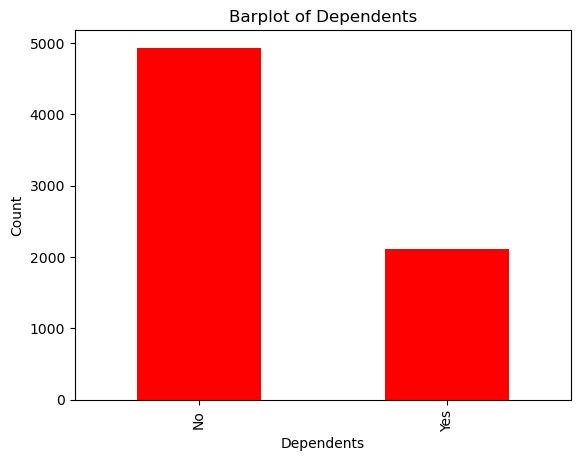

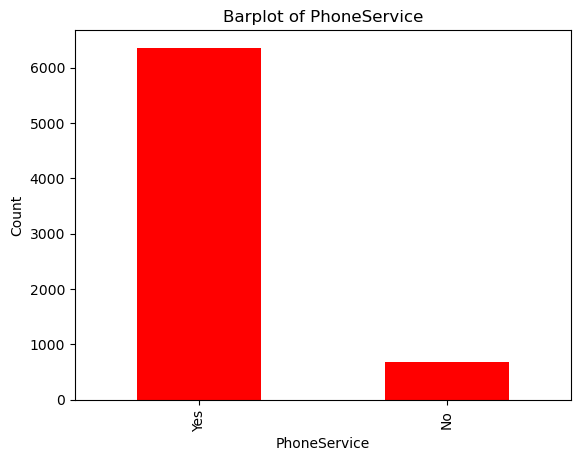

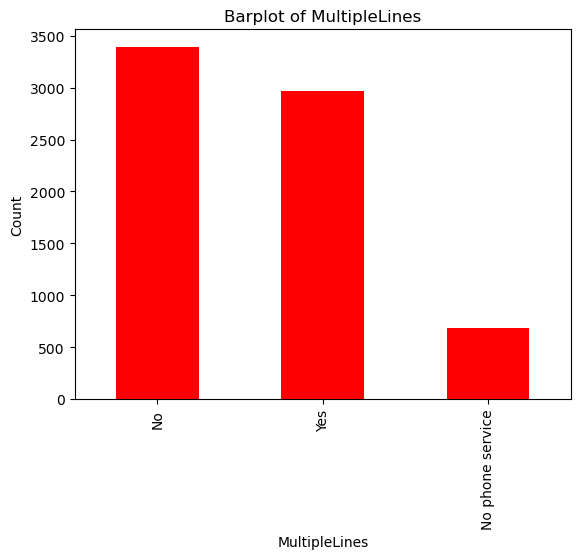

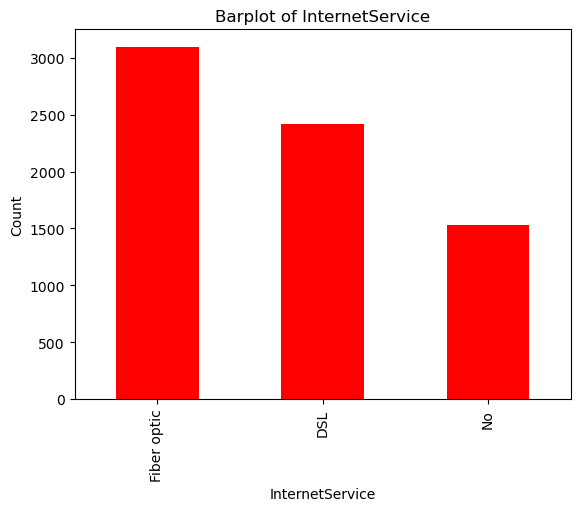

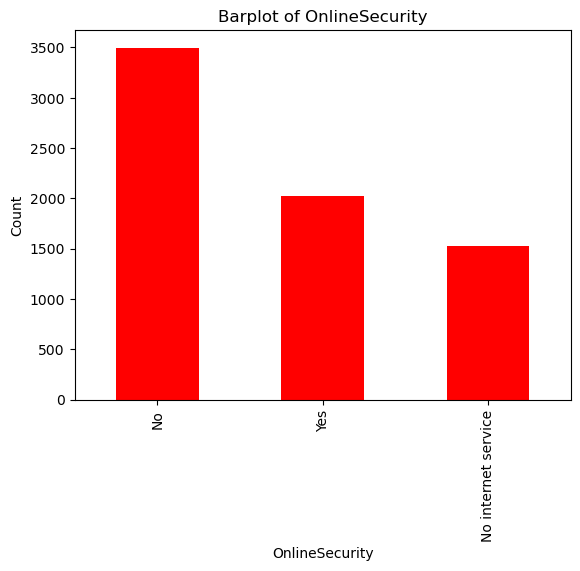

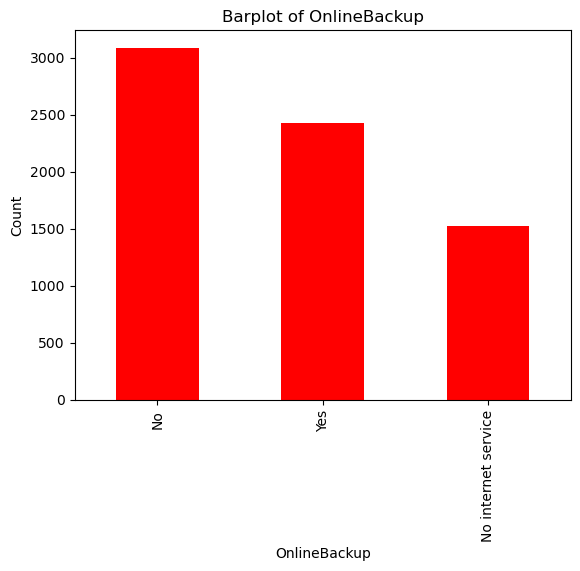

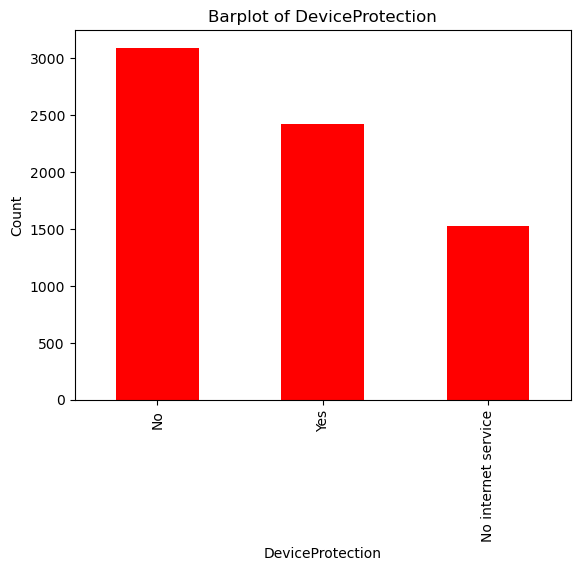

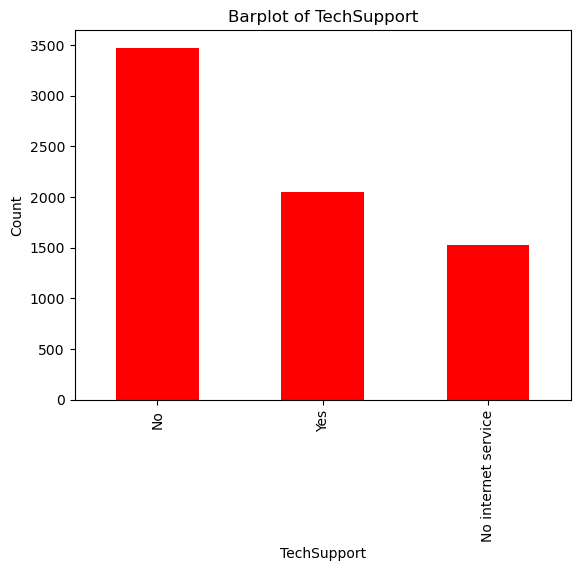

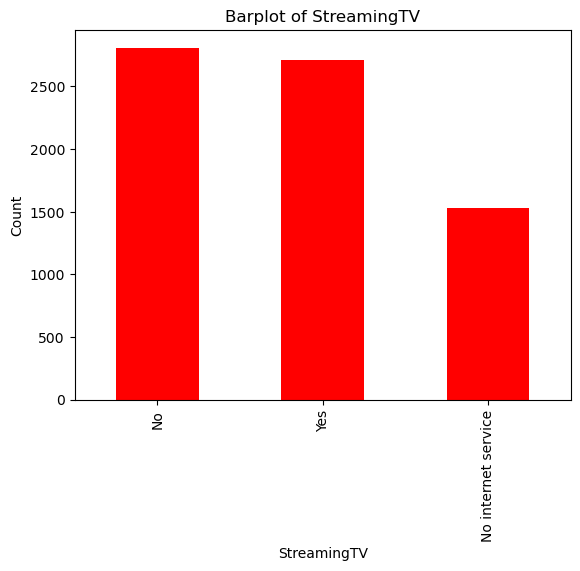

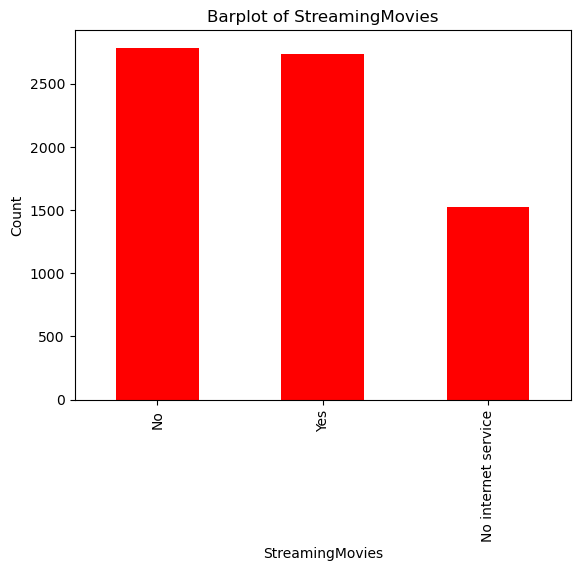

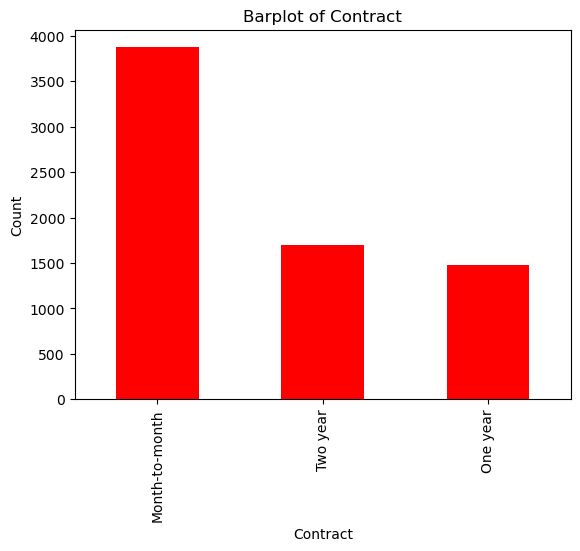

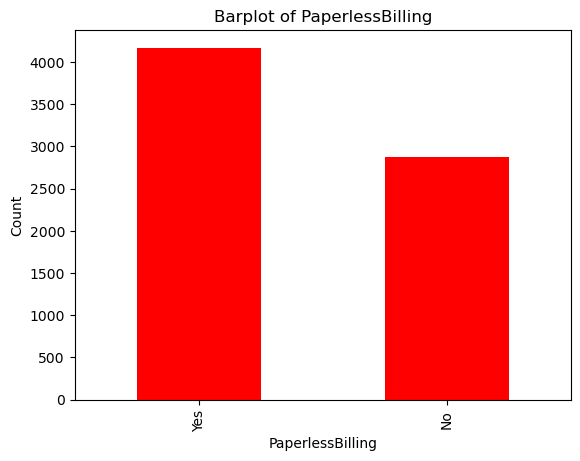

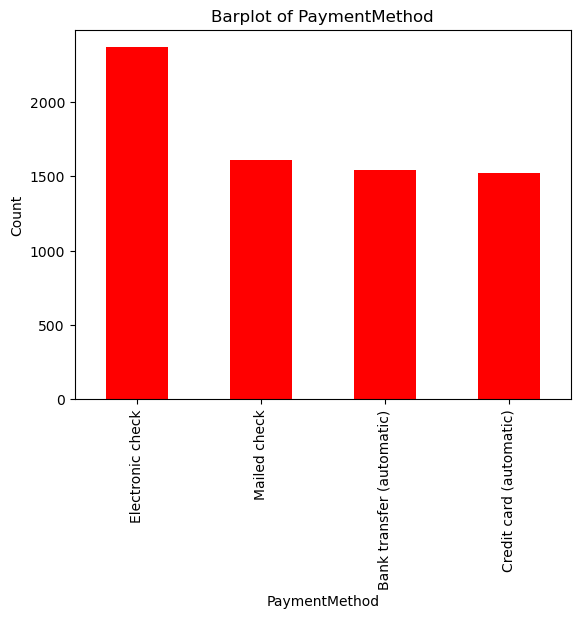

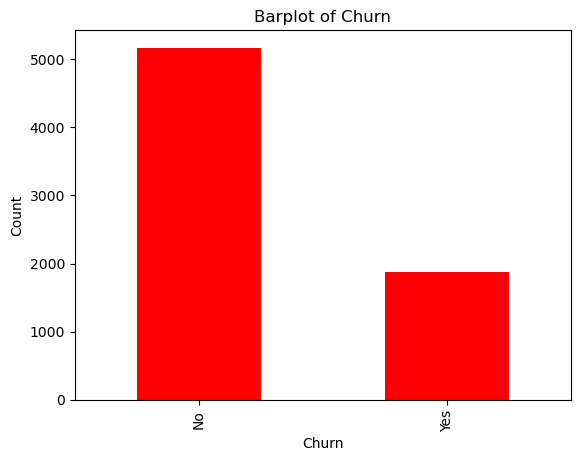

In [271]:
#barplots for the categorical features

for column in churn_data.columns:
    if churn_data[column].dtype == 'object':
        churn_data[column].value_counts().plot(kind='bar', color='red')
        plt.title(f'Barplot of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.show()
    

C:\Users\Naima Khan\Python Scripts\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Naima Khan\Python Scripts\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Naima Khan\Python Scripts\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Naima Khan\Python Scripts\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

C:\Users\Naima Khan\Python Scripts\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Naima Khan\Python Scripts\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Naima Khan\Python Scripts\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Naima Khan\Python Scripts\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

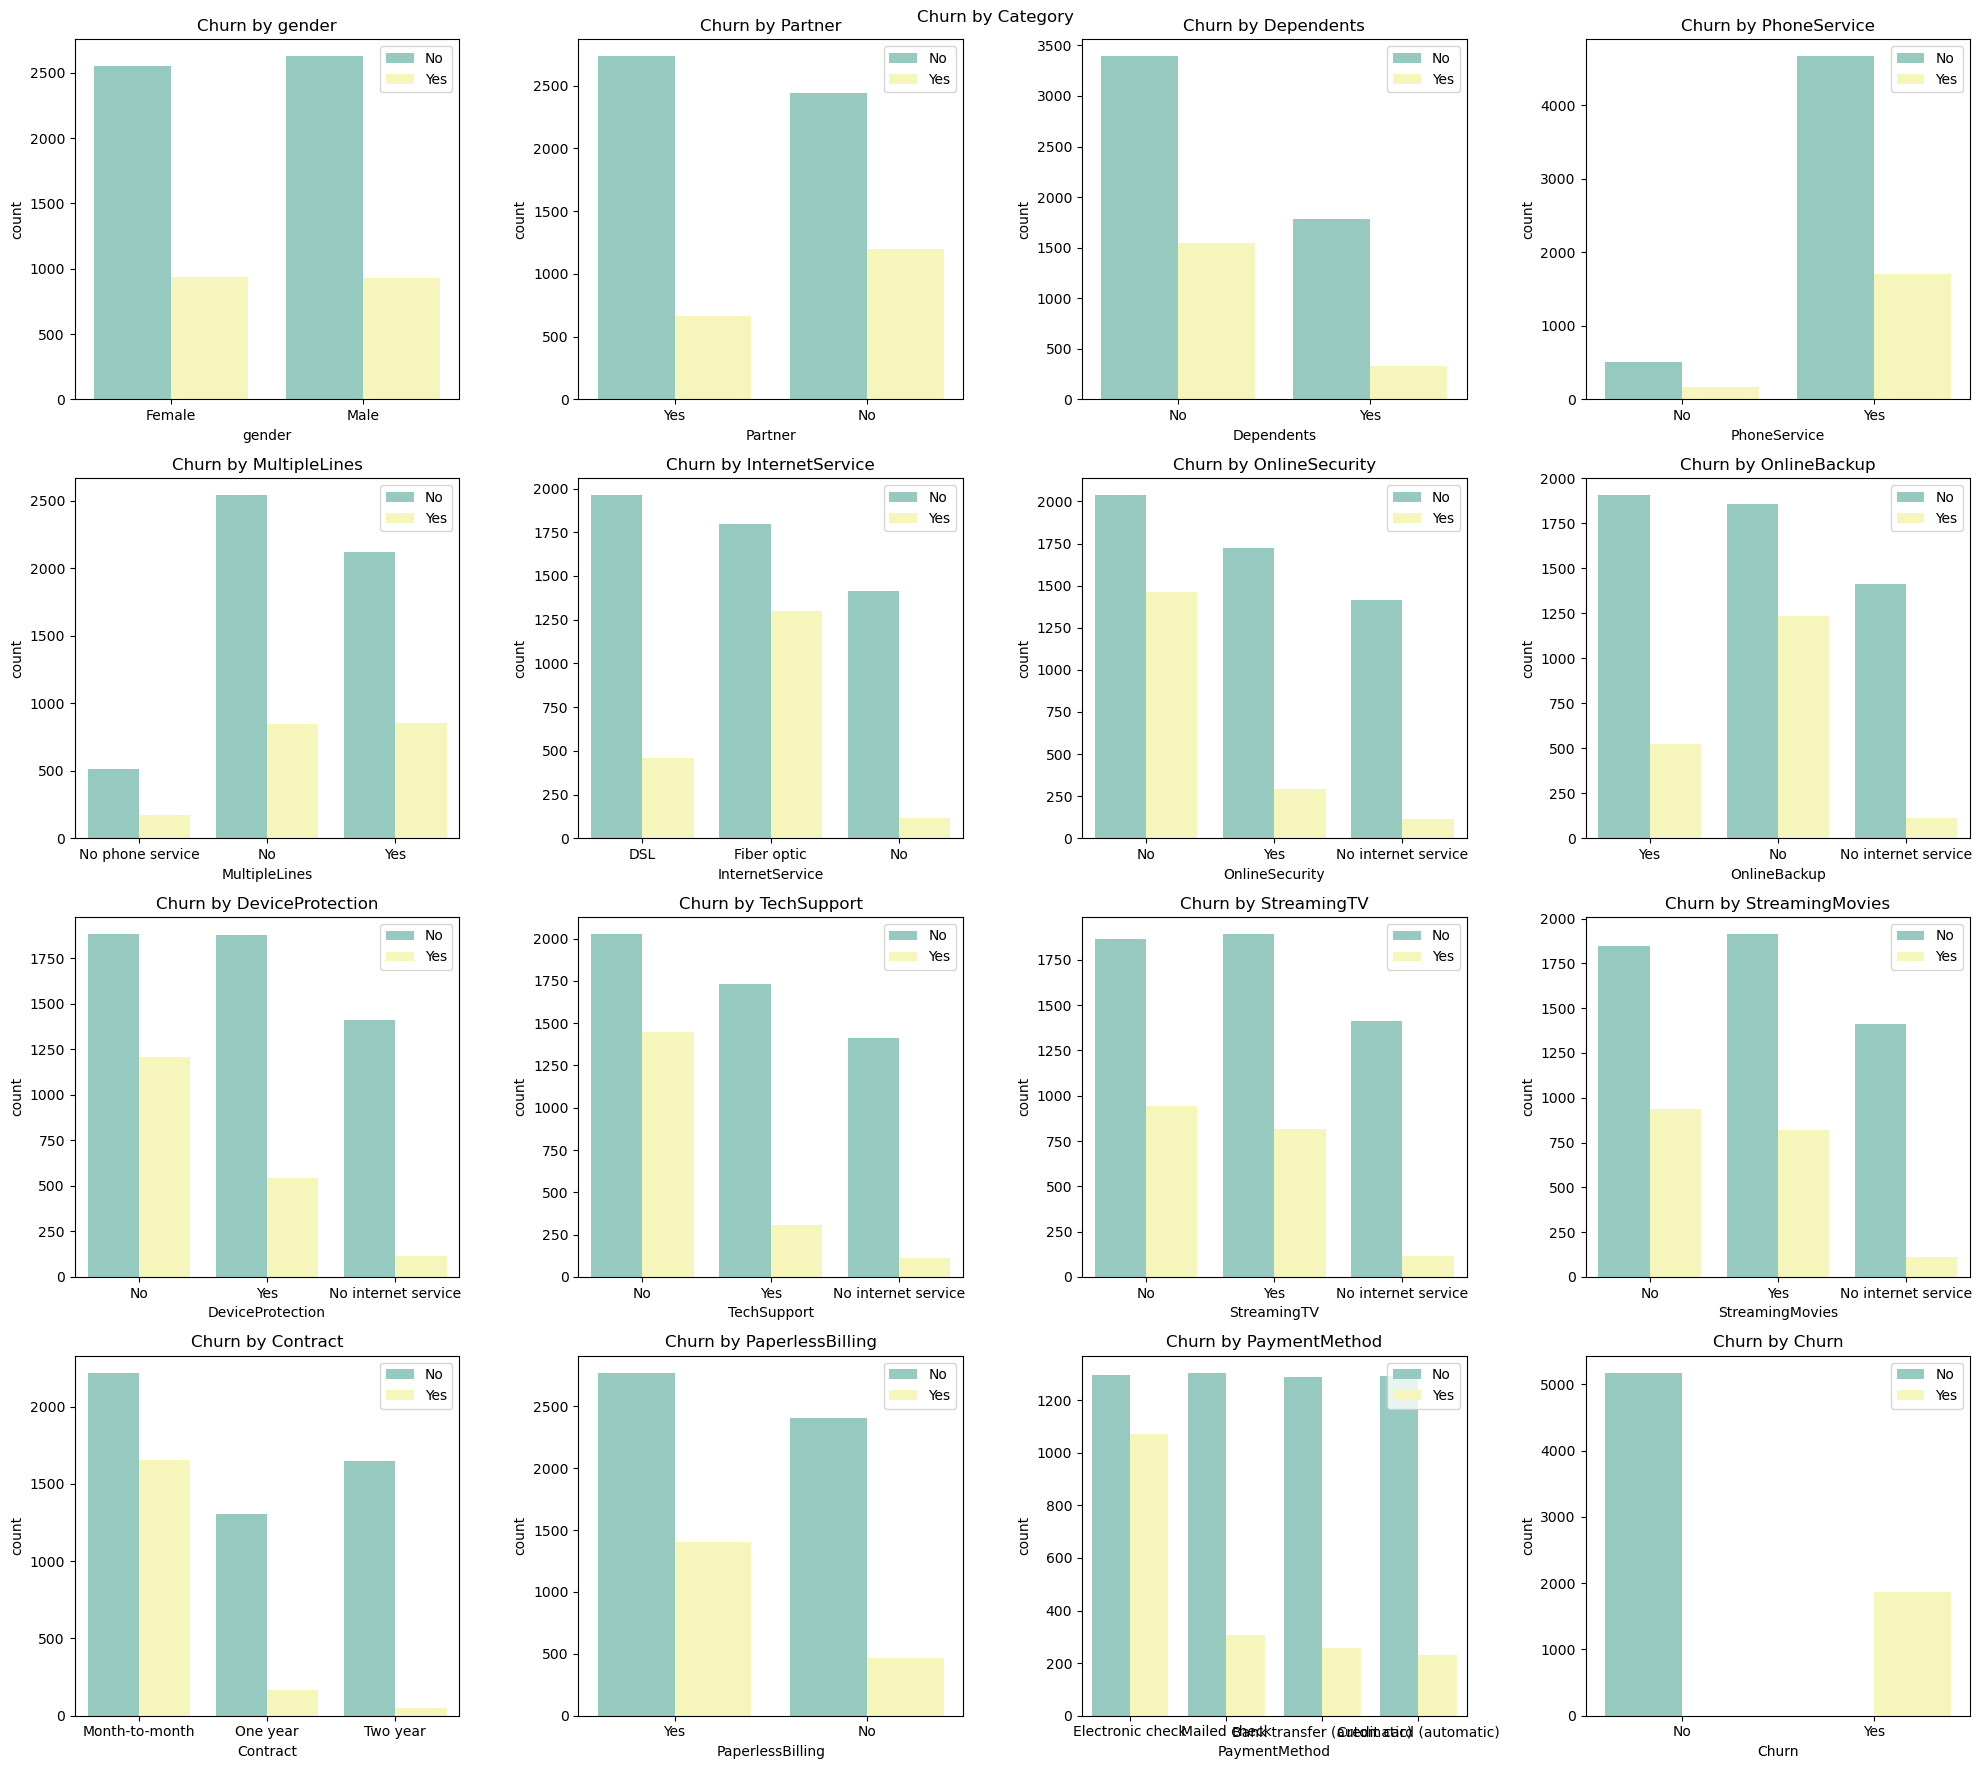

In [272]:
#churn by category
categorical = churn_data.drop(columns=['MonthlyCharges','TotalCharges','tenure','SeniorCitizen'])
fig, axes = plt.subplots(4, 4, figsize=(20, 18))
axes = axes.flatten()
fig.suptitle("Churn by Category")

for i, col in enumerate(categorical.columns):
    ax = axes[i]
    sns.countplot(data=churn_data, x=col, hue="Churn", ax=ax, palette="Set3")
    ax.legend()
    ax.set_title(f"Churn by {col}")


plt.tight_layout()

# Scatterplots

C:\Users\Naima Khan\Python Scripts\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Naima Khan\Python Scripts\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Naima Khan\Python Scripts\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Naima Khan\Python Scripts\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

C:\Users\Naima Khan\Python Scripts\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Naima Khan\Python Scripts\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Naima Khan\Python Scripts\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Naima Khan\Python Scripts\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

C:\Users\Naima Khan\Python Scripts\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Naima Khan\Python Scripts\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Naima Khan\Python Scripts\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Naima Khan\Python Scripts\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

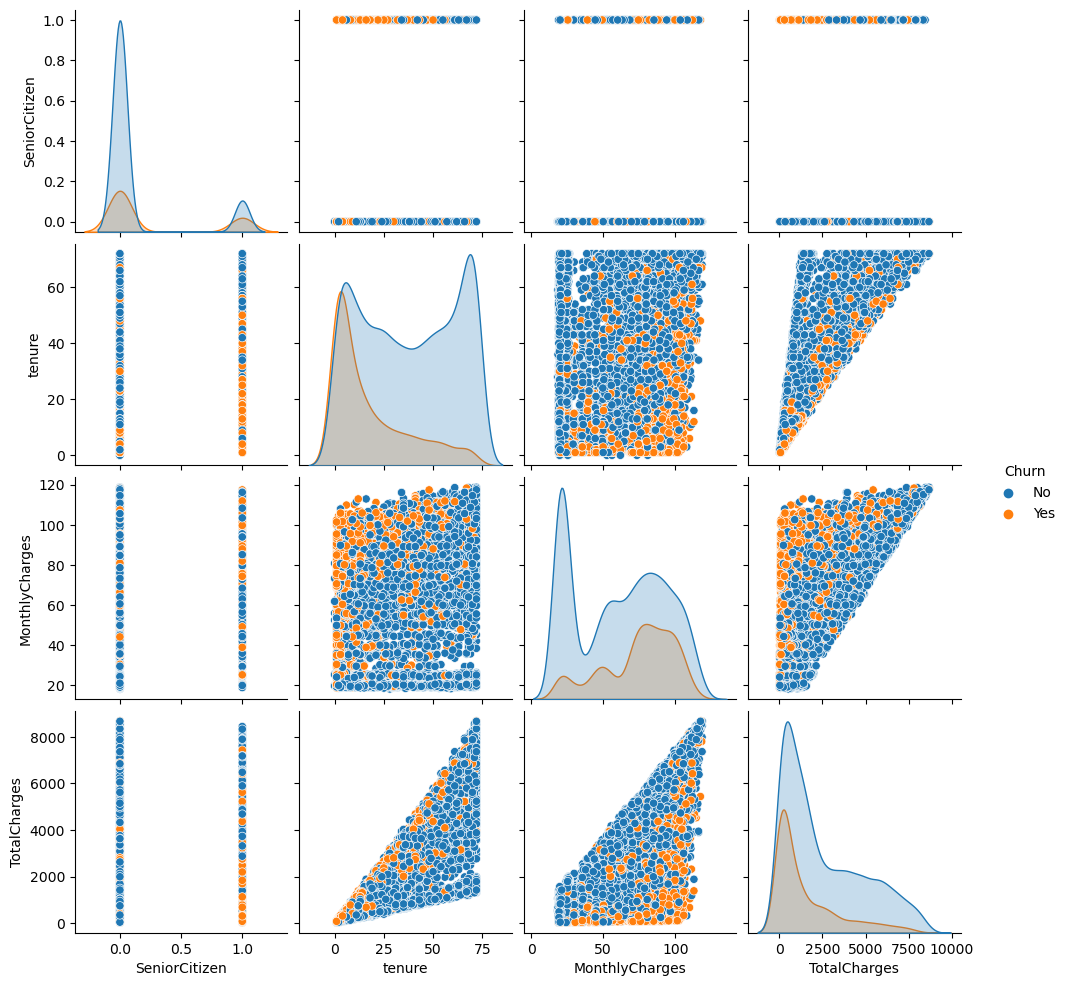

In [273]:
#scatter plots of numerical variables
import seaborn as sns
sns.pairplot(data = churn_data, hue='Churn')
plt.show()

# Classifiers, Confusion Matrix, Precison/Recall

In [274]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score,recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, RocCurveDisplay
from sklearn.metrics import precision_recall_curve
import numpy as np
import pandas as pd

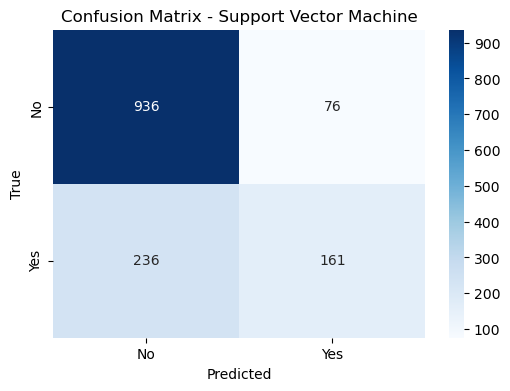

              precision    recall  f1-score   support

          No       0.80      0.92      0.86      1012
         Yes       0.68      0.41      0.51       397

    accuracy                           0.78      1409
   macro avg       0.74      0.67      0.68      1409
weighted avg       0.77      0.78      0.76      1409



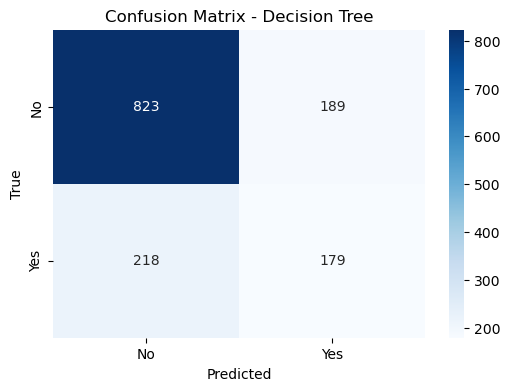

              precision    recall  f1-score   support

          No       0.79      0.81      0.80      1012
         Yes       0.49      0.45      0.47       397

    accuracy                           0.71      1409
   macro avg       0.64      0.63      0.63      1409
weighted avg       0.70      0.71      0.71      1409



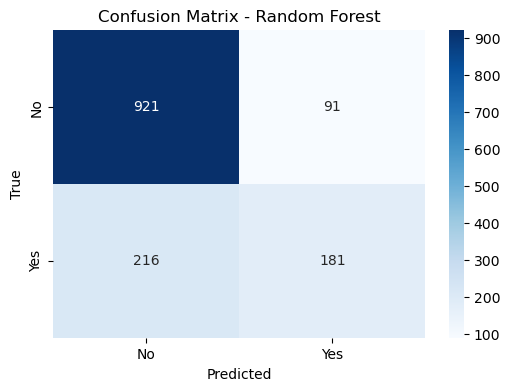

              precision    recall  f1-score   support

          No       0.81      0.91      0.86      1012
         Yes       0.67      0.46      0.54       397

    accuracy                           0.78      1409
   macro avg       0.74      0.68      0.70      1409
weighted avg       0.77      0.78      0.77      1409



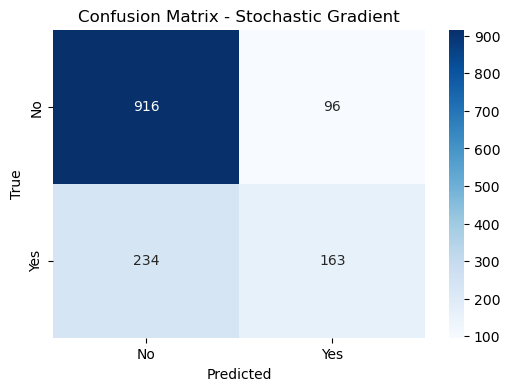

              precision    recall  f1-score   support

          No       0.80      0.91      0.85      1012
         Yes       0.63      0.41      0.50       397

    accuracy                           0.77      1409
   macro avg       0.71      0.66      0.67      1409
weighted avg       0.75      0.77      0.75      1409



,Classifier,Accuracy Score (%)
0,Random Forest,78.21
1,Support Vector Machine,77.86
2,Stochastic Gradient,76.58
3,Decision Tree,71.11


,Classifier,Precision,Recall
0,Support Vector Machine,0.679325,0.405542
1,Random Forest,0.665441,0.455919
2,Stochastic Gradient,0.629344,0.410579
3,Decision Tree,0.486413,0.450882


In [275]:
#naive bayes could not take negative values


X = churn_data.drop(columns='Churn')
y = churn_data['Churn']


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)


numerical = X.select_dtypes(include=np.number).columns
categorical = X.select_dtypes(exclude=np.number).columns


numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)),
])


preprocessor = ColumnTransformer(transformers=[
    ('numerical', numerical_transformer, numerical),
    ('categorical', categorical_transformer, categorical)
], remainder='passthrough')


classifiers = [
    SVC(random_state=20),
    DecisionTreeClassifier(random_state=20),
    RandomForestClassifier(random_state=20),
    SGDClassifier(random_state=20)
]

classifier_names = [
    'Support Vector Machine',
    'Decision Tree',
    'Random Forest',
    'Stochastic Gradient'
]

model_scores = []
precision_scores = []
recall_scores = []

for classifier, name in zip(classifiers, classifier_names):
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('selector', SelectKBest(k=len(X.columns))),
        ('classifier', classifier)])
    y_pred = pipe.fit(x_train, y_train).predict(x_test)
    score = accuracy_score(y_test, y_pred)
    
    score_percentage = f'{score * 100:.2f}'
    model_scores.append(score_percentage)
    
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()
    

    precision = precision_score(y_test, y_pred, pos_label='Yes')
    recall = recall_score(y_test, y_pred, pos_label='Yes')
    
    precision_scores.append(precision)
    recall_scores.append(recall)
    print(classification_report(y_test, y_pred))


model_performance = pd.DataFrame({
    'Classifier': classifier_names,
    'Accuracy Score (%)': model_scores 
}).sort_values('Accuracy Score (%)', ascending=False, ignore_index=True)

display(model_performance)

precision_recall_df = pd.DataFrame({
    'Classifier': classifier_names,
    'Precision': precision_scores,
    'Recall': recall_scores
}).sort_values('Precision', ascending=False, ignore_index=True)

display(precision_recall_df)



#scaling increased the accuracy
#random forest gives the highest accuracy score.


# Precision/Recall Plots

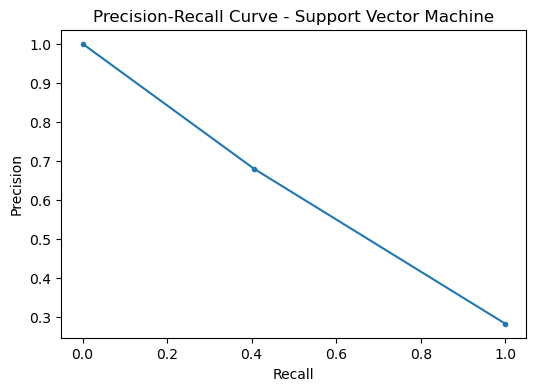

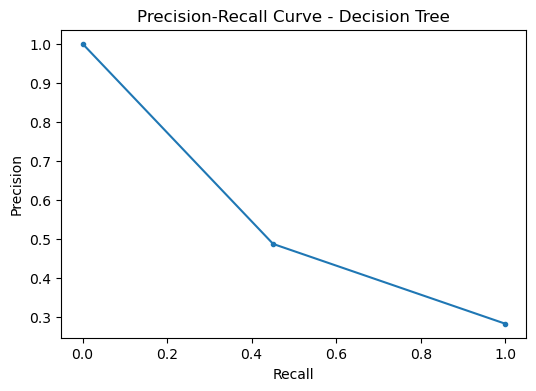

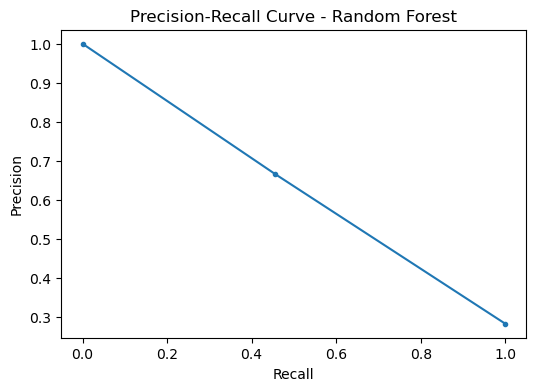

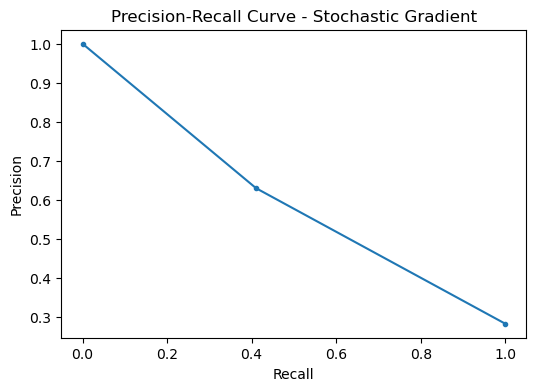

In [276]:
precision_recall = []

for classifier, name in zip(classifiers, classifier_names):
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('selector', SelectKBest(k=len(X.columns))),
        ('classifier', classifier)])
    
    y_pred = pipe.fit(x_train, y_train).predict(x_test)

    encoder = LabelEncoder()
    ytest_encoded = encoder.fit_transform(y_test)
    ypred_encoded = encoder.transform(y_pred)
    
    precision, recall, _ = precision_recall_curve(ytest_encoded, ypred_encoded, pos_label= 1)
    
    precision_recall.append({
        'Classifier': name,
        'Precision': precision,
        'Recall': recall
    })

for data in precision_recall:
    name = data['Classifier']
    precision = data['Precision']
    recall = data['Recall']
    
    plt.figure(figsize=(6, 4))
    plt.plot(recall, precision, marker='.')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {name}')
    plt.show()

## ROC Curves

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


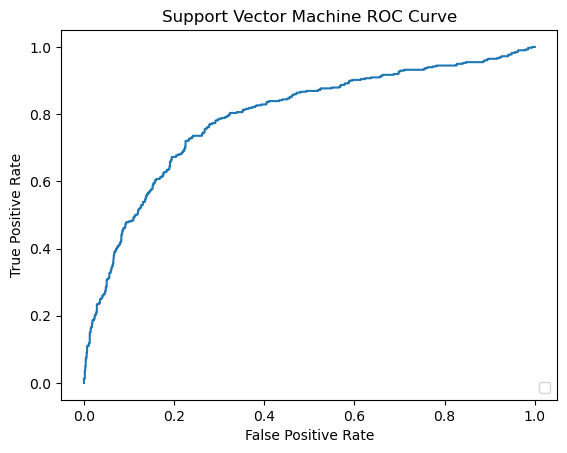

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


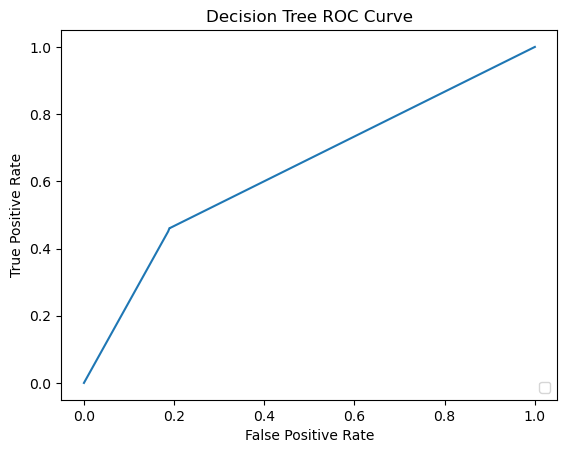

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


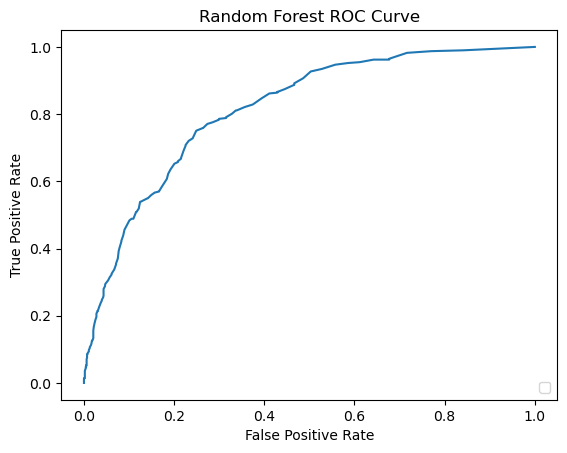

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


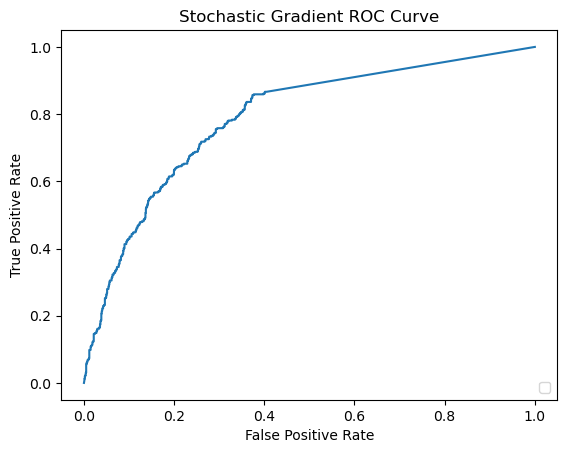

In [277]:
classifiers = [
    SVC(kernel='rbf', probability=True, random_state=20),
    DecisionTreeClassifier(random_state=20),
    RandomForestClassifier(random_state=20),
    SGDClassifier(loss='modified_huber', random_state=20)
]
for classifier, name in zip(classifiers, classifier_names):
    pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('selector', SelectKBest(k=len(X.columns))),
    ('classifier', classifier)
    ])
    y_pred_prob = pipe.fit(x_train, y_train).predict_proba(x_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob, pos_label='Yes')
    roc = RocCurveDisplay(fpr=fpr, tpr=tpr)
    roc.plot()
    plt.title(f"{name} ROC Curve")
    plt.show()

# Hyperparameter Tuning

In [278]:
from sklearn.model_selection import RandomizedSearchCV

numerical = X.select_dtypes(include=np.number).columns
categorical = X.select_dtypes(exclude=np.number).columns


numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)),
])


preprocessor = ColumnTransformer(transformers=[
    ('numerical', numerical_transformer, numerical),
    ('categorical', categorical_transformer, categorical)
], remainder='passthrough')

param_dist = {
    'classifier__n_estimators': [100, 200, 300], 
    'classifier__max_depth': [10, 20, 30, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': ['auto', 'sqrt', 'log2']
}

rf = RandomForestClassifier()

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', rf)])

random_search = RandomizedSearchCV(
    pipeline, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X, y)



Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\Naima Khan\Python Scripts\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
200 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
67 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Naima Khan\Python Scripts\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Naima Khan\Python Scripts\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Naima Khan\Python Scripts\Lib\site-packages\sklearn\pipeline.py", line

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('numerical',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                                              ('categorical',
                                                                               Pipeline(steps=[('encoder',...
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                                             ('classifier',
                                              RandomForestClassifier())]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'classifier__max_depth': [10, 20, 30,
                                                                  None],
                                        'classifier__max_features': ['auto',
                                                                     'sqrt',
                                                                     'log2'],
                                        'classifier__min_samples_leaf': [1, 2,
                                                                         4],
                                        'classifier__min_samples_split': [2, 5,
                                                                          10],
                                        'classifier__n_estimators': [100, 200,
                                                                     300]},
                   random_state=42, verbose=2)

In [279]:
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best Parameters:",best_params)
print("Best Score:",best_score)


Best Parameters: {'classifier__n_estimators': 100, 'classifier__min_samples_split': 5, 'classifier__min_samples_leaf': 4, 'classifier__max_features': 'log2', 'classifier__max_depth': 10}
Best Score: 0.8034946811084586


In [280]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_pred = random_search.predict(x_test)

accuracy = round(accuracy_score(y_test, y_pred),2)
precision = round(precision_score(y_test, y_pred, pos_label='Yes'),2)
recall = round(recall_score(y_test, y_pred, pos_label='Yes'),2)
f1 = round(f1_score(y_test, y_pred, pos_label='Yes'),2)

y_pred_prob = random_search.predict_proba(x_test)[:, 1]
roc_auc = round(roc_auc_score(y_test, y_pred_prob),2)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC-ROC:", roc_auc)


Accuracy: 0.83
Precision: 0.77
Recall: 0.57
F1 Score: 0.65
AUC-ROC: 0.92


# With Ensemble

In [289]:
from sklearn.ensemble import VotingClassifier

numerical = X.select_dtypes(include=np.number).columns
categorical = X.select_dtypes(exclude=np.number).columns

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)),
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical),
    ('cat', categorical_transformer, categorical)
])

classifiers = [
    ('svc', SVC(random_state=20)),
    ('decision_tree', DecisionTreeClassifier(random_state=20)),
    ('random_forest', RandomForestClassifier(random_state=20)),
    ('sgd', SGDClassifier(random_state=20))
]

ensemble_classifier = VotingClassifier(estimators=classifiers, voting='hard')

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', ensemble_classifier)])

pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Yes')
recall = recall_score(y_test, y_pred, pos_label='Yes')
f1 = f1_score(y_test, y_pred, pos_label='Yes')

print(f'Accuracy (%): {accuracy*100:.2f}')
print(f'Precision (%): {precision*100:.2f}')
print(f'Recall (%): {recall*100:.2f}')
print(f'F1 Score (%): {f1*100:.2f}')

  


Accuracy (%): 77.86
Precision (%): 69.06
Recall (%): 38.79
F1 Score (%): 49.68


# Summary

Out of all the classifiers used in the project, Random Forest Classifier (without hyperparameter tuning) gave the highest accuracy and f1 score of 0.78 and 0.77 respectively. With the hyperparameter tuning, the accuracy was increased to 0.83. Whereas, with the ensemble the accuracy and f1 score was 0.77 and 0.49 which was less than the Random Forest Classifier (with or without hyperparameter tuning). Therefore, we conclude that the individual classifiers especially Random Forest is the best estimator. 